In [143]:
# Network-x imports
from networkx.readwrite.graphml import read_graphml
import networkx as nx

# Graph Kernels import
from grakel.utils import graph_from_networkx
from grakel.kernels import WeisfeilerLehman, VertexHistogram, ShortestPath, RandomWalk, SubgraphMatching, NeighborhoodHash, GraphletSampling, PyramidMatch, SvmTheta

# SVM imports
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

# general imports
import os

# Data Preprocessing

## Data Loading

In [162]:
graphs = list()
labels = list()
files = list()
tags = {'linear-reg': 0, 'perceptron': 1, 'logistic-reg': 2, 'kmeans': 3}

for algo in os.listdir('ML/XML-Data'):
    for file in os.listdir('ML/XML-Data/'+algo):
        graphs.append(read_graphml('ML/XML-Data/'+algo+'/'+file))
        labels.append(tags[algo])
        files.append(file)

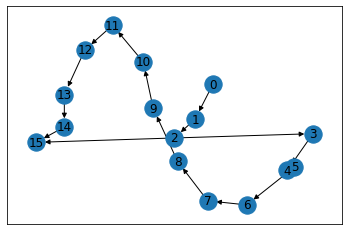

In [163]:
nx.draw_networkx(graphs[0])

In [164]:
G_train, G_test, Y_train, Y_test = train_test_split(graphs, labels, test_size=0.10, random_state=42)
len(G_train), len(G_test), len(Y_train), len(Y_test)

(414, 46, 414, 46)

## Convert Network-X Graph to Adj List Representation of GraKel

In [165]:
G_train = list(graph_from_networkx(G_train, node_labels_tag='label'))
G_test = list(graph_from_networkx(G_test, node_labels_tag='label'))

In [166]:
for i in range(len(G_train)):
    if (G_train[i].node_labels == {}):
        print(i, labels[i], files[i])

AttributeError: 'list' object has no attribute 'node_labels'

# Kernel Computation & SVM

## 1. Compute the Weisfeiler Lehman Kernel

In [167]:
# Initialize a Weisfeiler-Lehman subtree kernel
gk = WeisfeilerLehman()

In [168]:
# Construct kernel matrices
K_train = gk.fit_transform(G_train)
K_test = gk.transform(G_test)

In [169]:
# Train an SVM classifier
clf = SVC(kernel='precomputed')
clf.fit(K_train, Y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='precomputed', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [170]:
# Test classifier
Y_pred = clf.predict(K_test)

In [171]:
# Evaluate the predictions
print("Accuracy:", accuracy_score(Y_test, Y_pred))

Accuracy: 1.0


In [172]:
print(metrics.confusion_matrix(Y_test, Y_pred))

# Print the precision and recall, among other metrics
print(metrics.classification_report(Y_test, Y_pred, digits=2))

[[13  0  0  0]
 [ 0  9  0  0]
 [ 0  0 12  0]
 [ 0  0  0 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        12

    accuracy                           1.00        46
   macro avg       1.00      1.00      1.00        46
weighted avg       1.00      1.00      1.00        46



## 2. The random walk kernel class

In [173]:
gk = RandomWalk()

In [174]:
# Construct kernel matrices
K_train = gk.fit_transform(G_train)
K_test = gk.transform(G_test)

In [175]:
# Train an SVM classifier
clf = SVC(kernel='precomputed')
clf.fit(K_train, Y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='precomputed', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [176]:
# Test classifier
Y_pred = clf.predict(K_test)

In [177]:
print(metrics.confusion_matrix(Y_test, Y_pred))

# Print the precision and recall, among other metrics
print(metrics.classification_report(Y_test, Y_pred, digits=2))

[[13  0  0  0]
 [ 1  7  1  0]
 [ 0  0 12  0]
 [ 0  2  2  8]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       0.78      0.78      0.78         9
           2       0.80      1.00      0.89        12
           3       1.00      0.67      0.80        12

    accuracy                           0.87        46
   macro avg       0.88      0.86      0.86        46
weighted avg       0.88      0.87      0.86        46



In [179]:
gk = SubgraphMatching(ke=None)

In [180]:
# Construct kernel matrices
K_train = gk.fit_transform(G_train)
K_test = gk.transform(G_test)

## 3. 